In [ ]:
# default_exp densityRatioSugiyama

In [ ]:
# export
import rpy2

import rpy2.robjects as robjects

import os


import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

r = robjects.r

import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

for f in os.listdir("R/densityratiosugiyama/R"):
    r.source("R/densityratiosugiyama/R/{}".format(f))

ulsif = robjects.globalenv["ulsif"]

clsif = robjects.globalenv["clsif"]

eval_basis = robjects.globalenv["eval.basis"]

In [ ]:
#export
def estimate(x,y,lambda_=1):
    x0 = x[~y]
    x1 = x[y]
    m0 = r.matrix(x0.T,nrow=x0.shape[1],ncol=x0.shape[0])
    m1 = r.matrix(x1.T,nrow=x1.shape[1],ncol=x1.shape[0])
    results = clsif(m1,m0,lambda_)
    ratios = np.array(eval_basis(results,
                          r.matrix(x.T,
                                   nrow=x.shape[1],
                                   ncol=x.shape[0])))
    return ratios

In [ ]:
f1 = ss.norm(loc=8,scale=1)
f0 = ss.norm(loc=8,scale=1)

In [ ]:
x,y = np.concatenate((f1.rvs(100000),
                      f0.rvs(100000)))[:,None], np.concatenate((np.ones(100000),
                                                                np.zeros(100000))).astype(bool)

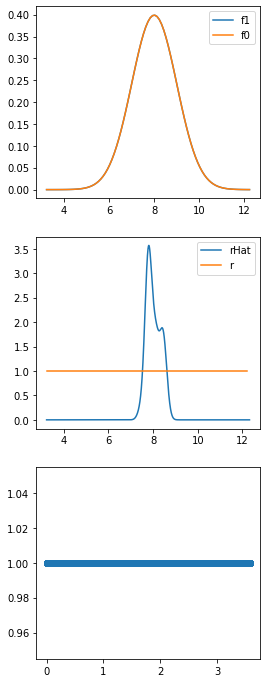

In [ ]:
rng = np.arange(x.min(),x.max(),.1,)
ests = estimate(x,y,lambda_=200)
fig,ax = plt.subplots(3,1,figsize=(4,12))
pdf1 = f1.pdf(rng)
pdf0 = f0.pdf(rng)
ax[0].plot(rng,pdf1,label="f1")
ax[0].plot(rng,pdf0,label="f0")
ax[1].plot(np.sort(x.ravel()),
           ests[np.argsort(x.ravel())],
           label="rHat")
ax[1].plot(rng,
           f0.pdf(rng) / f1.pdf(rng),label="r")
ax[2].scatter(ests, 
              f0.pdf(x)/f1.pdf(x),
              alpha=.5)
# ax[2].plot([x.min(),x.max()],
#            [x.min(),x.max()])
ax[1].legend()
ax[0].legend()